In [2]:
# !pip install -U scikit-learn

In [46]:
from IPython.display import Image
from IPython.core.display import HTML 

import warnings
warnings.filterwarnings('ignore')

## [DSO] Machine Learning Seminar Vol.4
2020-03-xx  
SKUE

In [4]:
Image(url="https://image.yodobashi.com/product/100/000/009/002/935/105/100000009002935105_10204.jpg")

## 次元削減でデータを圧縮する
### 主成分分析(Principal Component Analysis:PCA)
+ PCAアルゴリズム
 + 1.d次元のデータセットを標準化する
 + 2.標準化したデータセットの共分散行列を作成する
 + 3.共分散行列を固有ベクトルと固有値に分解する
 + 4.固有値を降順でソートすることで、対応する固有ベクトルをランク付けする
 + 5.最も大きいk個の固有値に対応するk個の固有ベクトルを選択する。この場合のkは新しい特徴部分空間の次元数を表す
 + 6.上位k個の固有ベクトルから射影行列Wを作成する
 + 7.射影行列Wを使ってd次元の入力データセットXを変換し、新しいk次元の特徴部分空間を取得する。

In [6]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [13]:
from sklearn.model_selection  import train_test_split # model_selectionに変わった。
from sklearn.preprocessing import StandardScaler

In [14]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [16]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

$$
\sigma_{jk} = \frac{1}{n} \sum_{i=1}^n \left ( x_j^{(i)} - \mu_j \right )  \left ( x_k^{(i)} - \mu_k \right )
$$


$$
\Sigma = \begin{bmatrix} \sigma_1^2 & \sigma_{12} & \sigma_{13} \\\ \sigma_{21} & \sigma_{2}^2 & \sigma_{23} \\\ \sigma_{31} & \sigma_{32} & \sigma_{3}^2 \end{bmatrix}
$$

$$
\Sigma \nu = \lambda \nu
$$

In [17]:
import numpy as np

In [18]:
cov_mat = np.cov(X_train_std.T) # Estimate a covariance matrix, given data and weights.

In [19]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat) # Compute the eigenvalues and right eigenvectors of a square array.

print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


In [20]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]

cum_var_exp = np.cumsum(var_exp)  # Return the cumulative sum of the elements along a given axis.

In [21]:
import matplotlib.pyplot as plt

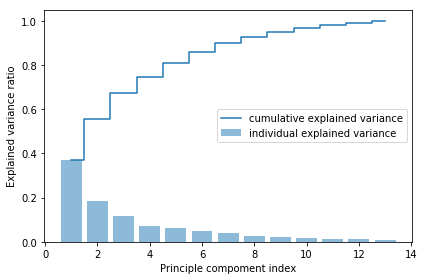

In [25]:
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
               label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
                label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principle compoment index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [27]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i])
                              for i in range(len(eigen_vals))]

eigen_pairs.sort(key=lambda k:k[0], reverse=True)

In [31]:
eigen_pairs

[(4.842745315655898,
  array([-0.13724218,  0.24724326, -0.02545159,  0.20694508, -0.15436582,
         -0.39376952, -0.41735106,  0.30572896, -0.30668347,  0.07554066,
         -0.32613263, -0.36861022, -0.29669651])),
 (2.4160245870352255,
  array([ 0.50303478,  0.16487119,  0.24456476, -0.11352904,  0.28974518,
          0.05080104, -0.02287338,  0.09048885,  0.00835233,  0.54977581,
         -0.20716433, -0.24902536,  0.38022942])),
 (1.5484582488203513,
  array([-0.13774873,  0.09615039,  0.67777567,  0.62504055,  0.19613548,
          0.14031057,  0.11705386,  0.13121778,  0.0304309 , -0.07992997,
          0.05305915,  0.13239103, -0.07065022])),
 (0.9612043774977367,
  array([-0.0032961 ,  0.56264669, -0.10897711,  0.0338187 , -0.36751107,
          0.24024513,  0.1870533 , -0.02292622,  0.49626233,  0.10648294,
         -0.36905375,  0.14201609, -0.16768217])),
 (0.8416616104578422,
  array([-0.29062523,  0.08953787, -0.16083499,  0.05158734,  0.67648707,
         -0.11851114,

In [28]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [29]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

In [32]:
X_train_pca = X_train_std.dot(w)

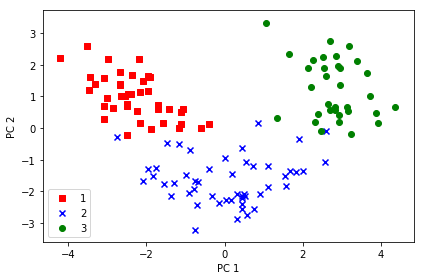

In [40]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1],
                       c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

## scikit-learnの主成分分析

In [44]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'V') # tuple型で用意
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                                              np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                            y=X[y == cl, 1],
                            alpha = 0.6,
                            c = cmap(idx),
                            edgecolor='black',
                            marker=markers[idx],
                            label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


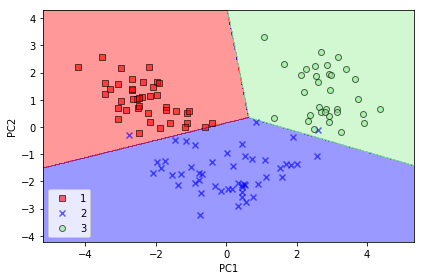

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)

lr.fit(X_train_pca, y_train) # 2次元からなる特徴量で予測

plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


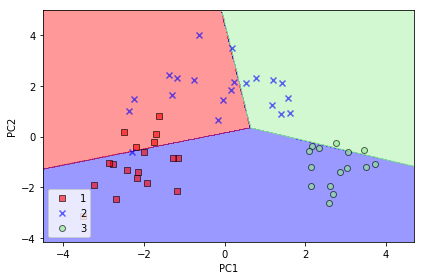

In [51]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [53]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)

pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

## 線形判別分析
+ Linear Discriminant Analysis


+ 主成分分析
 + データセットにおいて分散が最も大きい直交成分軸を見つける（教師なし）
 + 画像認識の分類結果が良いことがある。 
+ 線形判別分析
 + クラスの分離を最適化する特徴部分空間を見つける（教師あり）
 + データが正規分布に従っていること、クラスの共分散行列が全く同じであること、特徴量が統計的にみて互いに独立していることが前提となる。
  + 前提を多少満たしていなくても次元削減の手段としてLDAはそこそこうまくいくらしい。

+ 線形判別分析の内部の仕組み
 + 1.d次元のデータセットを標準化する
 + 2.クラスごとにd次元の平均ベクトルを計算する
 + 3.平均ベクトルを使って、クラス間変動行列\\( S_B \\)とクラス内変動行列\\(S_W\\)を生成する。
 + 4.行列\\( S_B^{-1} S_B \\)の固有ベクトルと対応する固有値を計算する。
 + 5.固有値を降順でソートすることで、対応する固有ベクトルをランク付けする。
 + 6.\\( d \times k \\)次元の変換行列Wを生成するために、最も大きいk個の固有値に対応するk個の固有ベクトルを選択する(固有ベクトルから変換行列Wを生成)。固有ベクトルは、この行列の列である。
 + 7.変換行列Wを使ってサンプルを新しい特徴部分空間へ射影する。

$$ m_i = \frac{1}{n_i} \sum_{x \in D_i } ^{c} x $$

$$
m_i = \begin{bmatrix} \mu_{i, alcohol} \\ \mu_{i, malic acid} \\ \dots \\ \mu_{i, proline} \end{bmatrix}^{T} \\
i \in \{1, 2, 3 \}
$$


In [55]:
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))
    print('MV %s: %s\n' %(label, mean_vecs[label-1]))

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



$$S_W = \sum_{i=1}^{c}S_i$$

$$S_i = \sum_{x \in D_i}^c (x - m_i)(x - m_i)^{T}$$

In [56]:
d = 13
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter

print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 13x13


In [57]:
print('Class label distribution; %s' % np.bincount(y_train)[1:])

Class label distribution; [41 50 33]


$$ \Sigma_i = \frac{1}{n_i}S_W = \frac{1}{n_i}\sum_{x \in D_i}^{c}(x - m_i)(x - m_i)^{T} $$

In [58]:
d = 13
S_B = np.zeros((d, d))

for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
    
print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Scaled within-class scatter matrix: 13x13


$$S_B = \sum_{i=1}^c n_i(m_i - m)(m_i -m)^{T}$$

In [59]:
mean_overall = np.mean(X_train_std, axis=0)
d = 13
S_B = np.zeros((d, d))

for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train == i + 1, :].shape[0]
    
    mean_vec = mean_vec.reshape(d, 1)
    mean_overall = mean_overall.reshape(d, 1)
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
    
print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 13x13


新しい特徴部分空間の線形判別を選択する

In [60]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [62]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i])
                            for i in range(len(eigen_vals))]

eigen_paris = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in descending order:

0.0
4.123807374708666
8.069559874516395
1.0212269154697694e-15
7.681434882063758e-16
7.681434882063758e-16
5.543887436795074e-16
5.543887436795074e-16
4.694448786656009e-16
3.319031313587839e-16
1.0000707796600032e-17
9.205762262180262e-17
9.205762262180262e-17


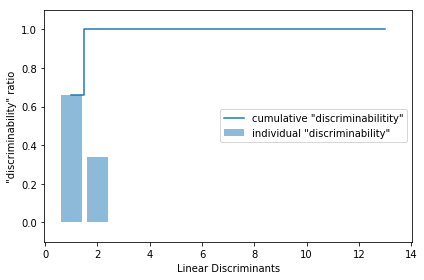

In [63]:
tot = sum(eigen_vals.real)
discr = [(i/tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 14), discr, alpha=0.5, align='center',
            label='individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid',
                label='cumulative "discriminabilitity"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [65]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
                          eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[ 0.7579 -0.4078]
 [-0.0971 -0.1817]
 [-0.2359 -0.3475]
 [ 0.246   0.3098]
 [-0.0481 -0.0644]
 [ 0.0956  0.0736]
 [ 0.0259  0.3031]
 [-0.0204 -0.0011]
 [ 0.05    0.0722]
 [-0.1017 -0.2792]
 [ 0.1571  0.2447]
 [-0.1089 -0.0449]
 [-0.4879 -0.5809]]


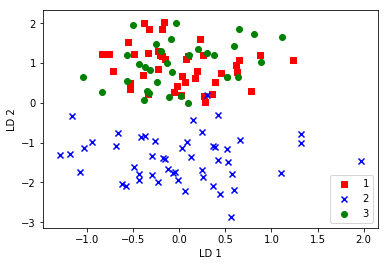

In [67]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0],
                        X_train_lda[y_train == l, 1] *(-1),
                        c=c,label=l,marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.show()

scikit-learnによる線形判別分析

In [68]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

In [70]:
X_train_lda.shape

(124, 2)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


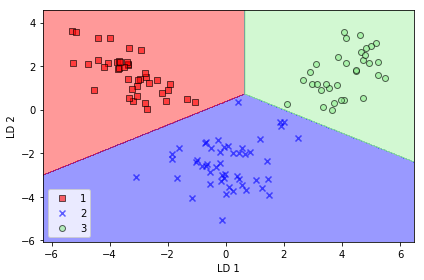

In [73]:
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


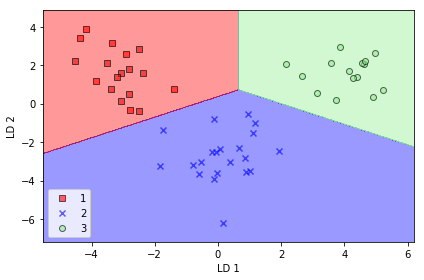

In [74]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

## カーネル主成分分析を使った非線形写像

### カーネル関数とカーネルトリック

$$ \phi : \mathbb{R}^d \rightarrow \mathbb{R}^k ( k > > d) $$


$$ x = [x_1, x_2  ]^T \\
↓ \phi \\
z = \left [  x_1^2, \sqrt{2x_1x_2}, x_2^2 \right ]^T
$$

$$ \sigma_{jk} = \frac{1}{n} \sum_{i=1}^n \left ( x_j^{(i)} - \mu_j \right ) \left (  x_k^{(i)} - \mu_k \right ) $$

$$ \sigma_{jk} = \frac{1}{n} \sum_{i=1}^n x_j^{(i)} x_k^{(i)} $$

$$ \Sigma =  \frac{1}{n} \sum_{i=1}^n x_j^{(i)} x_k^{(i)T} $$

+ Bernhard Scholkopfによる一般化
 + サンプル間の内積を非線形の特徴量の組み合わせに置き換えることができる
 
$$ \Sigma =  \frac{1}{n} \sum_{i=1}^n \phi \left ( x^{(i)} \right )  \phi \left ( x^{(i)} \right )^T $$

共分散行列から固有ベクトルを取り出す
$$ \Sigma \nu = \lambda \nu $$

$$ \frac{1}{n} \sum_{i=1}^n \phi \left ( x^{(i)} \right ) \phi \left ( x^{(i)} \right )^T  \nu = \lambda \nu \\
\nu =  \frac{1}{n \lambda } \sum_{i=1}^n   \phi \left ( x^{(i)} \right ) \phi \left ( x^{(i)} \right )^T \nu \\
= \frac{1}{n \lambda } \sum_{i=1}^n  \phi \left ( x^{(i)} \right ) \left ( \phi \left ( x^{(i)} \right )^T \nu \right ) \\
= \frac{1}{n } \sum_{i=1}^n a^{(i)}\phi \left ( x^{(i)} \right ) \\
\\
where  \quad a^{(i)} = \frac{ \phi \left ( x^{(i)} \right )^T \nu}{\lambda}
$$

カーネルトリックを使用することでサンプルxの関数同士の内積の計算をカーネル関数により回避できる。

+ 多項式カーネル

+ 双曲線正接カーネル

+ 動径基底関数（ガウスカーネル）

## カーネル主成分分析を実装

In [87]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    sq_dists = pdist(X, 'sqeuclidean')
    mat_sq_dists = squareform(sq_dists)
    
    K = exp(-gamma * mat_sq_dists)
    
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]
    
    X_pc = np.column_stack(( eigvecs[:, i] for i in range(n_components) ))
    
    return X_pc

### 半月形の分離

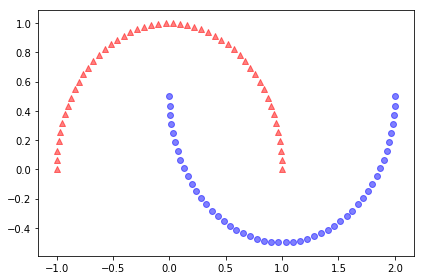

In [84]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

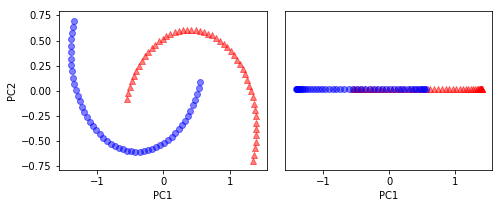

In [85]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1],
                         color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1],
                         color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y==0, 0], np.zeros((50, 1))+0.02,
                         color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((50, 1))+0.02,
                         color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

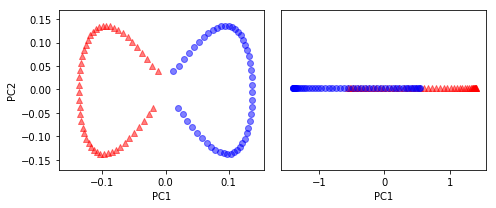

In [88]:
from matplotlib.ticker import FormatStrFormatter

X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
                         color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
                         color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y==0, 0], np.zeros((50, 1))+0.02,
                         color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((50, 1))+0.02,
                         color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

### 同心円の分離

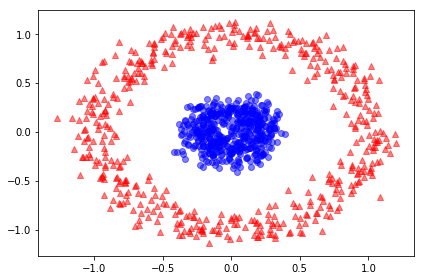

In [96]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

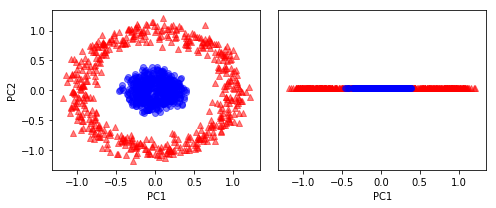

In [108]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1],
                         color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1],
                         color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y==0, 0], np.zeros((500, 1))+0.02,
                         color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((500, 1))+0.02,
                         color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

RBFカーネルPCAの実装

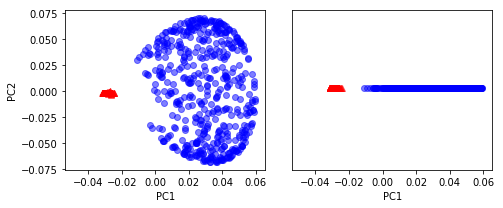

In [110]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
                         color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
                         color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y==0, 0], np.zeros((500, 1))+0.02,
                         color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((500, 1))+0.02,
                         color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

### 新しいデータ点を射影する

In [112]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    sq_dists = pdist(X, 'sqeuclidean')
    mat_sq_dists = squareform(sq_dists)
    
    K = exp(-gamma * mat_sq_dists)
    N = K.shape[0]
    one_n = np.ones((N,N))/N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(one_n)
    
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]
    
    alphas = np.column_stack((eigvecs[:, i] for i in range(n_components)))
    
    lambdas = [eigvals[i] for i in range(n_components)]
    
    return alphas, lambdas

In [113]:
X, y = make_moons(n_samples=100, random_state=123)
alphas, lambdas = rbf_kernel_pca(X, gamma=15, n_components=1)

In [114]:
x_new = X[25]
x_new

array([1.8713, 0.0093])

In [115]:
x_proj = alphas[25]
x_proj

array([-0.0788])

In [116]:
def project_x(x_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum((x_new-row)**2) for row in X])
    k = np.exp(-gamma*pair_dist)
    return k.dot(alphas / lambdas)

In [117]:
x_reproj = project_x(x_new, X, gamma=15, alphas=alphas, lambdas=lambdas)
x_reproj

array([-0.0788])

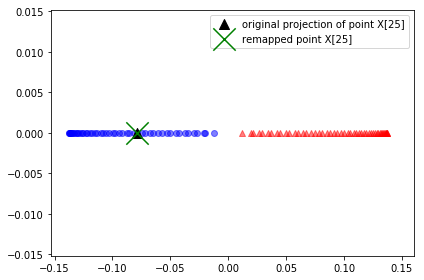

In [118]:
plt.scatter(alphas[y==0, 0], np.zeros((50)), color='red', marker='^', alpha=0.5)
plt.scatter(alphas[y==1, 0], np.zeros((50)), color='blue', marker='o', alpha=0.5)
plt.scatter(x_proj, 0, color='black', label='original projection of point X[25]',
                   marker='^', s=100)
plt.scatter(x_reproj, 0, color='green', label='remapped point X[25]',
                   marker='x', s=500)
plt.legend(scatterpoints=1)
plt.tight_layout()
plt.show()

scikit-learnのカーネル主成分分析

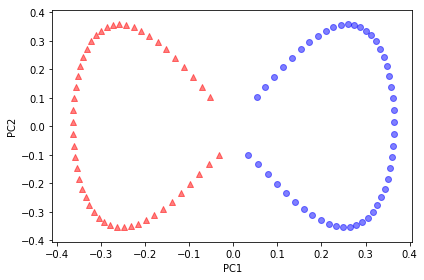

In [122]:
from sklearn.decomposition import KernelPCA
X, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1],
                   color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1],
                   color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

## Reference
+ https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
+ https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html
+ https://docs.scipy.org/doc/numpy/reference/routines.linalg.html
+ https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html